In [33]:
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [53]:
ws = pd.read_csv('./dataSets/cws_violations.csv')

In [42]:
import easymoney as em
from easymoney.money import EasyPeasy
ep = EasyPeasy()


In [52]:
med_inc = pd.read_csv('./dataSets/usa_median_hh_income.csv')
adjusted_inc = pd.DataFrame(columns=['year', 'median_hh_income'])

for i, inc in enumerate(med_inc.itertuples()):
    _year = getattr(inc, 'year')
    _inc = getattr(inc, 'median_hh_income')
    _2015_dollars = ep.normalize(amount=_inc, region="USA", from_year=_year, to_year=2015)
    adjusted_inc.set_value(i, 'year', _year)
    adjusted_inc.set_value(i, 'median_hh_income', _2015_dollars)

adjusted_inc.head()
adjusted_inc = adjusted_inc.set_index('year')
    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


,year,median_hh_income
0,1982,40570.9
1,1983,40483
2,1984,44064.6
3,1985,44839.7
4,1986,46387.4


'What is the average violations for community water systems in high income rural areas in 1993?'

rural = <16 units per square mile
sub-urban = 16–380.7
urban => 380.7

low income is below 75% of national median household income. In year 2015, national median household income was $55,775

i.e. 41831.25

In [8]:
high_income_rural_1993 = ws[((ws['median_hh_income'] >= 41931.25) & (ws['housing_unit_density'] < 16) & (ws['year'] == 1995))]

In [13]:
observations = len(high_income_rural_1993.index)
total = high_income_rural_1993['total_violations'].sum()
total / observations


0.16040462427745664

In [54]:
ws = ws.dropna()
rural_low_income = {}
rural_high_income = {}
suburban = {}
urban = {}

years = range(1982, 2016)

for year in years:
    
    income_thresh = .75 * adjusted_inc.loc[(year)]['median_hh_income']
    
    #rural high income
    rhi = ws[((ws['median_hh_income'] >= income_thresh) & (ws['housing_unit_density'] < 16) & (ws['year'] == year))]
    rhi_obs = len(rhi.index)
    rhi_tot = rhi['total_violations'].sum()
    rural_high_income[str(year)] = rhi_tot / rhi_obs
    
    #rural low income
    rli = ws[((ws['median_hh_income'] < income_thresh) & (ws['housing_unit_density'] < 16) & (ws['year'] == year))]
    rli_obs = len(rli.index)
    rli_tot = rli['total_violations'].sum()
    rural_low_income[str(year)] = rli_tot / rli_obs
    
    #suburban
    sub = ws[(ws['housing_unit_density'] >= 16) & (ws['housing_unit_density'] < 380.7) & (ws['year'] == year)]
    sub_obs = len(sub.index)
    sub_tot = sub['total_violations'].sum()
    suburban[str(year)] = sub_tot / sub_obs
    
    #urban
    urb = ws[(ws['housing_unit_density'] > 380.7) & (ws['year'] == year)]
    urb_obs = len(urb.index)
    urb_tot = urb['total_violations'].sum()
    urban[str(year)] = urb_tot / urb_obs

In [21]:
with open('./dataSets/time_trends/rural_low_income.json', 'w') as out:
    json.dump(rural_low_income, out)

with open('./dataSets/time_trends/rural_high_income.json', 'w') as out:
    json.dump(rural_high_income, out)

with open('./dataSets/time_trends/suburban.json', 'w') as out:
    json.dump(suburban, out)

with open('./dataSets/time_trends/urban.json', 'w') as out:
    json.dump(urban, out)

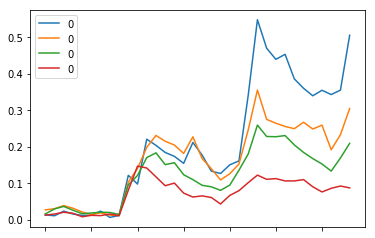

In [55]:
rural_low_income_df = pd.DataFrame(rural_low_income, index=[0]).transpose()
rural_high_df = pd.DataFrame(rural_high_income, index=[0]).transpose()
suburban_df = pd.DataFrame(suburban, index=[0]).transpose()
urban_df = pd.DataFrame(urban, index=[0]).transpose()

ax = rural_low_income_df.plot()
rural_high_df.plot(ax=ax)
suburban_df.plot(ax=ax)
urban_df.plot(ax=ax)
